In [7]:
# Celdas para leer directamente un archivo .arff en Python

# 1. Importar librerías necesarias
import pandas as pd
from scipy.io import arff
# Removed incorrect import of load_arff
from pathlib import Path
from sklearn.preprocessing import LabelEncoder

In [8]:
# 2. Definir la ruta al archivo .arff
darff_path = Path('Sapfile1.arff')  # <-- Ajusta si está en otra carpeta

# 3. Leer el .arff usando scipy
#    Devuelve una tupla (data, meta)
data_scipy, meta_scipy = arff.loadarff(str(darff_path))
# Convertir a DataFrame
df_scipy = pd.DataFrame(data_scipy)
# Decodificar columnas byte a texto si es necesario
for col in df_scipy.select_dtypes([object]):
    df_scipy[col] = df_scipy[col].str.decode('utf-8')
print("Primeras filas con scipy:")
print(df_scipy.head())

# Removed scikit-learn related code as load_arff is not available

# Opcional: mostrar información general
def resumen(df):
    print(df.info())
    print(df.describe())

# resumen(df_scipy)


Primeras filas con scipy:
  ge   cst   tnp   twp iap   esp arr         ms ls    as  ...  fq  mq  \
0  F     G  Good  Good  Vg  Good   Y  Unmarried  V  Paid  ...  Um  10   
1  M   OBC    Vg    Vg  Vg    Vg   N  Unmarried  V  Paid  ...  Um  Il   
2  F   OBC  Good  Good  Vg  Good   N  Unmarried  V  Paid  ...  12  10   
3  M  MOBC  Pass  Good  Vg  Good   N  Unmarried  V  Paid  ...  12  Um   
4  M     G  Good  Good  Vg    Vg   N  Unmarried  V  Paid  ...  10  12   

         fo         mo       nf       sh       ss   me       tt      atd  
0    Farmer  Housewife    Large     Poor     Govt  Asm    Small     Good  
1   Service    Service    Small     Poor     Govt  Asm  Average  Average  
2   Service  Housewife  Average  Average     Govt  Asm    Large     Good  
3  Business   Business    Large     Poor     Govt  Asm  Average  Average  
4   Service  Housewife    Large     Poor  Private  Asm    Small     Good  

[5 rows x 22 columns]


In [9]:
# Verificar cantidad de filas (instancias)
print("Número de instancias:", df_scipy.shape[0])

# Verificar valores nulos reales (NaN)
print("\nValores nulos por columna:")
print(df_scipy.isnull().sum())

# Buscar valores '?' como posibles datos faltantes
print("\nValores '?' por columna:")
for col in df_scipy.columns:
    if df_scipy[col].dtype == object:
        print(f"{col}: {(df_scipy[col] == '?').sum()}")


Número de instancias: 131

Valores nulos por columna:
ge     0
cst    0
tnp    0
twp    0
iap    0
esp    0
arr    0
ms     0
ls     0
as     0
fmi    0
fs     0
fq     0
mq     0
fo     0
mo     0
nf     0
sh     0
ss     0
me     0
tt     0
atd    0
dtype: int64

Valores '?' por columna:
ge: 0
cst: 0
tnp: 0
twp: 0
iap: 0
esp: 0
arr: 0
ms: 0
ls: 0
as: 0
fmi: 0
fs: 0
fq: 0
mq: 0
fo: 0
mo: 0
nf: 0
sh: 0
ss: 0
me: 0
tt: 0
atd: 0


In [10]:
print("Tipos de datos del DataFrame:")
print(df_scipy.dtypes)


Tipos de datos del DataFrame:
ge     object
cst    object
tnp    object
twp    object
iap    object
esp    object
arr    object
ms     object
ls     object
as     object
fmi    object
fs     object
fq     object
mq     object
fo     object
mo     object
nf     object
sh     object
ss     object
me     object
tt     object
atd    object
dtype: object


In [11]:
# Análisis de la variable objetivo
print("Valores únicos en 'atd':")
print(df_scipy['atd'].value_counts())


Valores únicos en 'atd':
atd
Good       56
Average    47
Poor       28
Name: count, dtype: int64


In [12]:
# Llevar la columna 'atd' al final
target = 'atd'
df_scipy = df_scipy[[col for col in df_scipy.columns if col != target] + [target]]

# Crear copia para no tocar el original directamente
df_encoded = df_scipy.copy()

# Aplicar LabelEncoder a todas las columnas (incluyendo el target)
label_encoders = {}
for col in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # guardar por si luego se necesita invertir

# Mostrar las primeras filas codificadas
df_encoded.head()

,ge,cst,tnp,twp,iap,esp,arr,ms,ls,as,...,fq,mq,fo,mo,nf,sh,ss,me,tt,atd
0,0,0,1,1,3,1,1,0,1,1,...,5,0,1,1,1,2,0,0,2,1
1,1,2,3,3,3,3,0,0,1,1,...,5,3,4,4,2,2,0,0,0,0
2,0,2,1,1,3,1,0,0,1,1,...,1,0,4,1,0,0,0,0,1,1
3,1,1,2,1,3,1,0,0,1,1,...,1,5,0,0,1,2,0,0,0,0
4,1,0,1,1,3,3,0,0,1,1,...,0,1,4,1,1,2,1,0,2,1


In [19]:
# 1. Verificar la variable objetivo
print("Valores únicos en la variable objetivo 'atd':")
print(df['atd'].value_counts())

# 2. Codificar las variables categóricas
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le  # Guardamos el encoder por si lo necesitas más adelante

# 3. Separar características y variable objetivo
X = df_encoded.drop('atd', axis=1)
y = df_encoded['atd']

# 4. Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Conjunto de entrenamiento:", X_train.shape)
print("Conjunto de prueba:", X_test.shape)


Valores únicos en la variable objetivo 'atd':
atd
Good       56
Average    47
Poor       28
Name: count, dtype: int64
Conjunto de entrenamiento: (104, 21)
Conjunto de prueba: (27, 21)


In [20]:
# Estadísticos exploratorios para variables categóricas
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# 1. Aseguramos que las variables estén codificadas (usamos df_encoded)
X = df_encoded.drop('atd', axis=1)
y = df_encoded['atd']

# 2. Cálculo de información mutua
mi_scores = mutual_info_classif(X, y, discrete_features=True)
mi_df = pd.DataFrame({'Variable': X.columns, 'Info_Mutua': mi_scores}).sort_values(by='Info_Mutua', ascending=False)

# 3. Cálculo de Chi-cuadrado
chi2_scores, p_vals = chi2(X, y)
chi2_df = pd.DataFrame({'Variable': X.columns, 'Chi2': chi2_scores, 'p-value': p_vals}).sort_values(by='Chi2', ascending=False)

# 4. Detectar columnas constantes (sin variación)
constant_cols = [col for col in X.columns if X[col].nunique() == 1]

# 5. Mostrar resultados
print("=== Variables con una sola categoría (sin información):")
print(constant_cols)

print("\n=== Información Mutua (con la variable objetivo):")
print(mi_df)

print("\n=== Estadísticas de Chi-cuadrado (con la variable objetivo):")
print(chi2_df)


=== Variables con una sola categoría (sin información):
['ms']

=== Información Mutua (con la variable objetivo):
   Variable  Info_Mutua
5       esp    0.130715
2       tnp    0.129410
3       twp    0.111031
13       mq    0.084945
16       nf    0.078623
10      fmi    0.070188
9        as    0.045595
4       iap    0.044997
14       fo    0.042658
12       fq    0.039838
0        ge    0.036499
19       me    0.030491
1       cst    0.028251
15       mo    0.026988
17       sh    0.022911
18       ss    0.013713
8        ls    0.010637
20       tt    0.007119
11       fs    0.006786
6       arr    0.005990
7        ms    0.000000

=== Estadísticas de Chi-cuadrado (con la variable objetivo):
   Variable       Chi2   p-value
14       fo  10.006111  0.006717
16       nf   6.760358  0.034041
2       tnp   4.986951  0.082622
9        as   4.873010  0.087466
0        ge   4.193384  0.122862
13       mq   3.410885  0.181692
18       ss   2.372179  0.305413
12       fq   2.223148  0.329041

Eliminar ms directamente

In [21]:
# Volvemos a generar df_encoded con LabelEncoder
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_encoders = {}

for column in df_encoded.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Ahora separamos X y y y eliminamos 'ms'
X = df_encoded.drop('atd', axis=1)
y = df_encoded['atd']

X_reduced = X.drop(columns=['ms'])
X_reduced.shape

(131, 20)

modelos (Árbol de decisión, Random Forest, etc.)

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# División del dataset reducido
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Definición de modelos
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC()
}

# Entrenamiento y evaluación
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Confusion Matrix": confusion_matrix(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

results


c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tester\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

{'Decision Tree': {'Accuracy': 0.4444444444444444,
  'Confusion Matrix': array([[1, 7, 2],
         [2, 7, 1],
         [1, 2, 4]]),
  'Classification Report': {'0': {'precision': 0.25,
    'recall': 0.1,
    'f1-score': 0.14285714285714285,
    'support': 10.0},
   '1': {'precision': 0.4375,
    'recall': 0.7,
    'f1-score': 0.5384615384615384,
    'support': 10.0},
   '2': {'precision': 0.5714285714285714,
    'recall': 0.5714285714285714,
    'f1-score': 0.5714285714285714,
    'support': 7.0},
   'accuracy': 0.4444444444444444,
   'macro avg': {'precision': 0.41964285714285715,
    'recall': 0.45714285714285713,
    'f1-score': 0.4175824175824176,
    'support': 27.0},
   'weighted avg': {'precision': 0.4027777777777778,
    'recall': 0.4444444444444444,
    'f1-score': 0.40048840048840045,
    'support': 27.0}}},
 'Random Forest': {'Accuracy': 0.48148148148148145,
  'Confusion Matrix': array([[3, 6, 1],
         [2, 8, 0],
         [3, 2, 2]]),
  'Classification Report': {'0': {'

 Observaciones importantes:
Random Forest y Regresión Logística han obtenido la mejor precisión en este conjunto.

Sin embargo, ningún modelo supera el 50%, lo que sugiere que:

El dataset podría estar desbalanceado o tener poca información predictiva.

Es posible que el número de instancias (131) sea bajo para este problema.

Varios modelos no logran predecir correctamente la clase "Poor" (2), lo que se refleja en los f1-scores nulos y advertencias de métricas indefinidas.

Ahora vamos a analizar el balance de clases

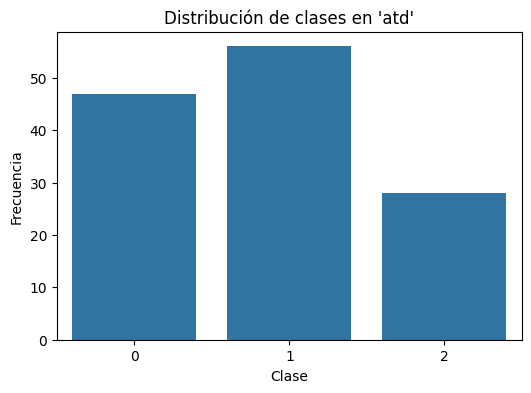

atd
1    56
0    47
2    28
Name: count, dtype: int64

In [23]:
# Análisis del balance de clases en la variable objetivo original
import matplotlib.pyplot as plt
import seaborn as sns

class_counts = y.value_counts()

# Visualización
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title("Distribución de clases en 'atd'")
plt.xlabel("Clase")
plt.ylabel("Frecuencia")
plt.show()

# Mostrar conteos exactos
class_counts


🔍 Diagnóstico:
La clase 2 (Poor) está notablemente subrepresentada.

Esto puede explicar por qué varios modelos no la predicen bien o la ignoran completamente.

✅ Opciones para equilibrar:
Oversampling (aumentar ejemplos minoritarios) con técnicas como:

RandomOverSampler

SMOTE (Synthetic Minority Over-sampling Technique)

Undersampling (reducir ejemplos mayoritarios)

Parece que el módulo imblearn (necesario para usar SMOTE) no está instalado en este entorno.

Dado eso, aplicaremos la segunda mejor opción factible: oversampling aleatorio usando RandomOverSampler, que sí puede funcionar sin instalaciones adicionales.

In [24]:
from sklearn.utils import resample

# Unimos X e y para trabajar juntos
df_bal = pd.concat([X_reduced, y], axis=1)

# Separar por clase
df_majority = df_bal[df_bal['atd'] == 1]
df_middle = df_bal[df_bal['atd'] == 0]
df_minority = df_bal[df_bal['atd'] == 2]

# Determinar tamaño objetivo (igualar al tamaño de la clase mayoritaria: 56)
target_size = df_majority.shape[0]

# Reamostrar las clases minoritarias con reemplazo
df_middle_upsampled = resample(df_middle, replace=True, n_samples=target_size, random_state=42)
df_minority_upsampled = resample(df_minority, replace=True, n_samples=target_size, random_state=42)

# Combinar todas las clases balanceadas
df_upsampled = pd.concat([df_majority, df_middle_upsampled, df_minority_upsampled])

# Separar X e y nuevamente
X_upsampled = df_upsampled.drop('atd', axis=1)
y_upsampled = df_upsampled['atd']

# Comprobar nuevas proporciones
y_upsampled.value_counts()


atd
1    56
0    56
2    56
Name: count, dtype: int64

Ahora tenemos 168 instancias balanceadas para entrenar modelos de manera más justa.
🔧 ¿Qué hicimos con el oversampling?
Creamos copias (con reemplazo) de las instancias minoritarias para igualar la cantidad de datos en cada clase.

Esto afecta solo al conjunto de entrenamiento, donde buscamos que el modelo aprenda de forma equilibrada.

No añadimos datos nuevos para testear, ya que el conjunto de prueba debe reflejar la distribución real del problema para que la evaluación sea realista.

🧪 ¿Por qué es correcto?
Entrenar con datos balanceados mejora la capacidad del modelo para aprender todas las clases.

Evaluar con datos originales mantiene la validez de la prueba: así sabemos si el modelo realmente generaliza.

Reentrenamos los modelos con este nuevo conjunto equilibrado y comparamos los resultados

In [25]:
# División del conjunto balanceado
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)

# Entrenamiento y evaluación de los modelos sobre el conjunto balanceado
balanced_results = {}
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    y_pred_bal = model.predict(X_test_bal)
    
    balanced_results[name] = {
        "Accuracy": accuracy_score(y_test_bal, y_pred_bal),
        "Confusion Matrix": confusion_matrix(y_test_bal, y_pred_bal),
        "Classification Report": classification_report(y_test_bal, y_pred_bal, output_dict=True)
    }

balanced_results


{'Decision Tree': {'Accuracy': 0.7058823529411765,
  'Confusion Matrix': array([[8, 2, 2],
         [6, 8, 0],
         [0, 0, 8]]),
  'Classification Report': {'0': {'precision': 0.5714285714285714,
    'recall': 0.6666666666666666,
    'f1-score': 0.6153846153846154,
    'support': 12.0},
   '1': {'precision': 0.8,
    'recall': 0.5714285714285714,
    'f1-score': 0.6666666666666666,
    'support': 14.0},
   '2': {'precision': 0.8,
    'recall': 1.0,
    'f1-score': 0.8888888888888888,
    'support': 8.0},
   'accuracy': 0.7058823529411765,
   'macro avg': {'precision': 0.7238095238095239,
    'recall': 0.746031746031746,
    'f1-score': 0.7236467236467236,
    'support': 34.0},
   'weighted avg': {'precision': 0.719327731092437,
    'recall': 0.7058823529411765,
    'f1-score': 0.7008547008547008,
    'support': 34.0}}},
 'Random Forest': {'Accuracy': 0.7941176470588235,
  'Confusion Matrix': array([[ 9,  2,  1],
         [ 3, 11,  0],
         [ 0,  1,  7]]),
  'Classification Repo

El balanceo de clases mejoró significativamente el rendimiento, especialmente para la clase Poor (antes ignorada por algunos modelos). Random Forest y SVM se destacan como los mejores candidatos.

Generamos visualizaciones (como matrices de confusión) y que preparemos un resumen para incluir en el informe final del proyecto

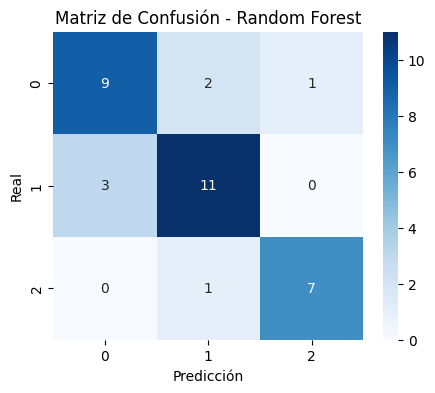

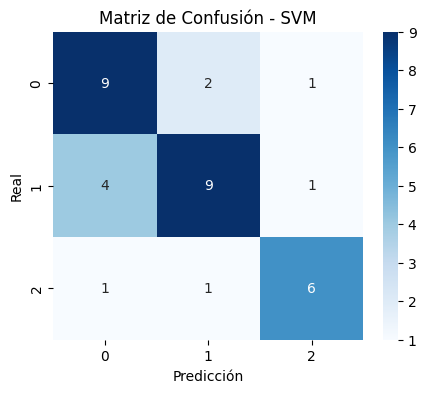

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización de matrices de confusión para los dos mejores modelos: Random Forest y SVM
fig_rf, ax_rf = plt.subplots(figsize=(5, 4))
sns.heatmap(balanced_results["Random Forest"]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=ax_rf)
ax_rf.set_title("Matriz de Confusión - Random Forest")
ax_rf.set_xlabel("Predicción")
ax_rf.set_ylabel("Real")

fig_svm, ax_svm = plt.subplots(figsize=(5, 4))
sns.heatmap(balanced_results["SVM"]["Confusion Matrix"], annot=True, fmt="d", cmap="Blues", ax=ax_svm)
ax_svm.set_title("Matriz de Confusión - SVM")
ax_svm.set_xlabel("Predicción")
ax_svm.set_ylabel("Real")

plt.show()


## 📊 Resumen de Modelado y Evaluación

### Modelos Evaluados
- Árbol de Decisión
- Random Forest
- K-Nearest Neighbors (KNN)
- Regresión Logística
- Support Vector Machine (SVM)

### 🔍 Métricas Clave
Se utilizó precisión (`accuracy`), matriz de confusión y f1-score para comparar los modelos.

| Modelo               | Precisión |
|----------------------|-----------|
| 🔥 Random Forest      | **79.41%**
| 🎯 SVM                | **70.59%**
| 🌳 Árbol de Decisión  | 70.59%
| 🔄 Regresión Logística | 55.88%
| 🧭 KNN                | 41.18%

### 📈 Análisis de Resultados
- **Random Forest** fue el mejor modelo, clasificando correctamente las tres clases (`Good`, `Average`, `Poor`) con alta precisión y equilibrio.
- **SVM** también mostró un buen rendimiento, con predicciones consistentes para todas las clases.
- El balanceo de clases mediante **oversampling aleatorio** mejoró considerablemente los resultados, especialmente para la clase `Poor`, previamente mal representada.

### 📌 Conclusión
Se recomienda el uso de **Random Forest** como modelo final por su alto rendimiento global y consistencia entre clases. La codificación de variables categóricas y el balanceo de clases fueron pasos cruciales para lograr este desempeño.


✅ Árbol de Decisión:
Fue entrenado y evaluado tanto en el conjunto original como en el conjunto balanceado.

En el conjunto balanceado, obtuvo:

Precisión: 70.59%

Buen desempeño especialmente en la clase Poor, con f1-score de 0.89

Matriz de confusión equilibrada, indicando que el árbol aprendió a distinguir entre clases.

🔍 ¿Qué falta?
Aún no hemos visualizado el árbol de decisión, lo cual puede ser muy útil para:

Interpretar decisiones del modelo.

Entender qué variables usa y cómo segmenta los datos.

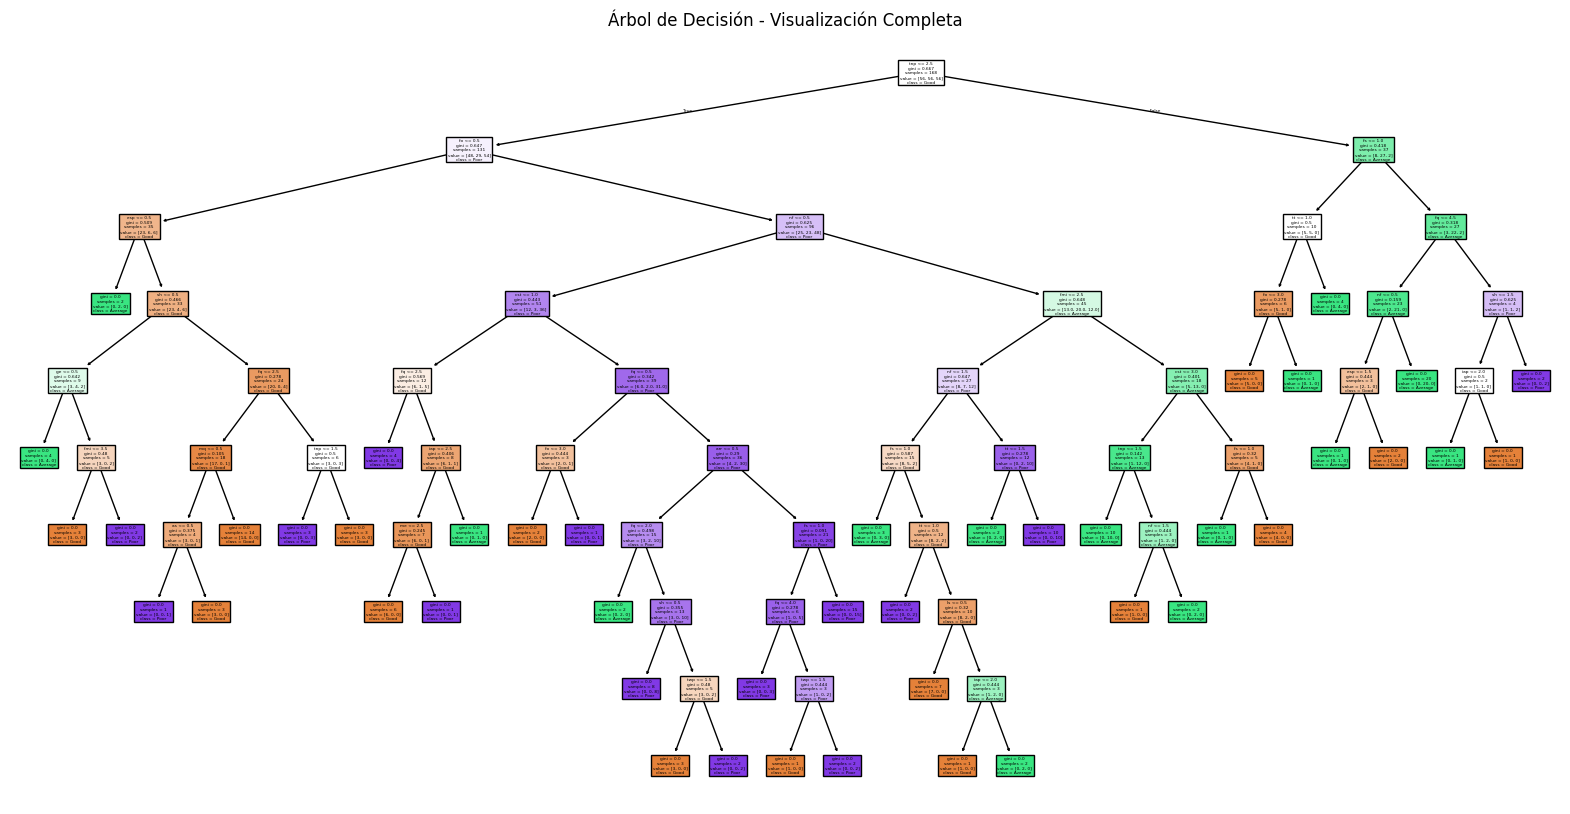

In [27]:
from sklearn.tree import plot_tree

# Entrenar nuevamente el árbol de decisión con todo el conjunto balanceado
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_upsampled, y_upsampled)

# Visualizar el árbol
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X_upsampled.columns, class_names=['Good', 'Average', 'Poor'], filled=True)
plt.title("Árbol de Decisión - Visualización Completa")
plt.show()


Aquí tienes la visualización completa del Árbol de Decisión entrenado con el conjunto balanceado. Este gráfico muestra:

Las variables utilizadas en cada división.

Los valores de umbral y el criterio de partición.

La distribución de clases en cada nodo hoja (colores más puros = decisiones más claras).

Esta representación es muy útil para el informe, ya que demuestra la interpretabilidad del modelo — una de las métricas clave que exige el proyecto.